In [1]:
import pandas as pd
import os
wd = os.getcwd()
path = wd + '/Downloads/NYPD.csv'
df = pd.read_csv(path)
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,862042320,121,STATEN ISLAND,1/1/20,9:00:00,7/31/20,9:00:00,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,F,943455,166716,40.624188,-74.146960,"(40.624187673000044, -74.14695963399998)",POINT (-74.14695963399998 40.624187673000044)
1,778330997,75,BROOKLYN,1/1/20,8:00:00,12/15/20,8:00:00,COMPLETED,NaN,NaN,...,NaN,45-64,BLACK,M,1018634,189016,40.685423,-73.876024,"(40.68542345700007, -73.87602423999994)",POINT (-73.87602423999994 40.68542345700007)
2,756033996,111,QUEENS,1/1/20,12:00:00,10/10/20,12:00:00,COMPLETED,NaN,NaN,...,NaN,45-64,ASIAN / PACIFIC ISLANDER,F,1058158,218872,40.767129,-73.733187,"(40.76712876700003, -73.73318666799997)",POINT (-73.73318666799997 40.76712876700003)
3,234297078,107,QUEENS,1/1/20,19:00:00,1/1/20,22:00:00,COMPLETED,NaN,NaN,...,NaN,25-44,WHITE HISPANIC,M,1044271,209494,40.741494,-73.783404,"(40.74149380400007, -73.78340351899999)",POINT (-73.78340351899999 40.74149380400007)
4,837979901,5,MANHATTAN,1/1/20,0:01:00,12/20/20,23:59:00,COMPLETED,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,E,983903,200257,40.716344,-74.001253,"(40.71634415200003, -74.00125319299997)",POINT (-74.00125319299997 40.71634415200003)


In [2]:
import findspark
findspark.init()
import pyspark as spark
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from pyspark import SparkContext, SQLContext
sc = SparkContext()
s = SQLContext(sc)
data = s.read.options(header=True).csv(path)
data.createOrReplaceTempView("data")
data.printSchema()

root
 |-- CMPLNT_NUM: string (nullable = true)
 |-- ADDR_PCT_CD: string (nullable = true)
 |-- BORO_NM: string (nullable = true)
 |-- CMPLNT_FR_DT: string (nullable = true)
 |-- CMPLNT_FR_TM: string (nullable = true)
 |-- CMPLNT_TO_DT: string (nullable = true)
 |-- CMPLNT_TO_TM: string (nullable = true)
 |-- CRM_ATPT_CPTD_CD: string (nullable = true)
 |-- HADEVELOPT: string (nullable = true)
 |-- HOUSING_PSA: string (nullable = true)
 |-- JURISDICTION_CODE: string (nullable = true)
 |-- JURIS_DESC: string (nullable = true)
 |-- KY_CD: string (nullable = true)
 |-- LAW_CAT_CD: string (nullable = true)
 |-- LOC_OF_OCCUR_DESC: string (nullable = true)
 |-- OFNS_DESC: string (nullable = true)
 |-- PARKS_NM: string (nullable = true)
 |-- PATROL_BORO: string (nullable = true)
 |-- PD_CD: string (nullable = true)
 |-- PD_DESC: string (nullable = true)
 |-- PREM_TYP_DESC: string (nullable = true)
 |-- RPT_DT: string (nullable = true)
 |-- STATION_NAME: string (nullable = true)
 |-- SUSP_AGE_GR

In [3]:
df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,862042320,121,STATEN ISLAND,1/1/20,9:00:00,7/31/20,9:00:00,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,F,943455,166716,40.624188,-74.146960,"(40.624187673000044, -74.14695963399998)",POINT (-74.14695963399998 40.624187673000044)
1,778330997,75,BROOKLYN,1/1/20,8:00:00,12/15/20,8:00:00,COMPLETED,NaN,NaN,...,NaN,45-64,BLACK,M,1018634,189016,40.685423,-73.876024,"(40.68542345700007, -73.87602423999994)",POINT (-73.87602423999994 40.68542345700007)
2,756033996,111,QUEENS,1/1/20,12:00:00,10/10/20,12:00:00,COMPLETED,NaN,NaN,...,NaN,45-64,ASIAN / PACIFIC ISLANDER,F,1058158,218872,40.767129,-73.733187,"(40.76712876700003, -73.73318666799997)",POINT (-73.73318666799997 40.76712876700003)
3,234297078,107,QUEENS,1/1/20,19:00:00,1/1/20,22:00:00,COMPLETED,NaN,NaN,...,NaN,25-44,WHITE HISPANIC,M,1044271,209494,40.741494,-73.783404,"(40.74149380400007, -73.78340351899999)",POINT (-73.78340351899999 40.74149380400007)
4,837979901,5,MANHATTAN,1/1/20,0:01:00,12/20/20,23:59:00,COMPLETED,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,E,983903,200257,40.716344,-74.001253,"(40.71634415200003, -74.00125319299997)",POINT (-74.00125319299997 40.71634415200003)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404892,988706831,45,BRONX,12/31/20,5:30:00,12/31/20,14:30:00,COMPLETED,NaN,NaN,...,NaN,25-44,WHITE HISPANIC,M,1032342,257664,40.873780,-73.826107,"(40.873779789000025, -73.82610652899997)",POINT (-73.82610652899997 40.873779789000025)
404893,780729893,25,MANHATTAN,12/31/20,8:50:00,NaN,NaN,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK HISPANIC,F,1002009,233607,40.807864,-73.935851,"(40.80786349500005, -73.93585066099996)",POINT (-73.93585066099996 40.80786349500005)
404894,694763592,24,MANHATTAN,12/31/20,12:45:00,12/31/20,12:50:00,COMPLETED,NaN,11475.0,...,NaN,45-64,BLACK,F,991885,227972,40.792412,-73.972428,"(40.792411505000075, -73.97242796299997)",POINT (-73.97242796299997 40.792411505000075)
404895,203039918,46,BRONX,12/31/20,16:45:00,12/31/20,17:20:00,COMPLETED,NaN,NaN,...,NaN,25-44,BLACK,F,1010368,250581,40.854431,-73.905589,"(40.85443147800004, -73.90558940299998)",POINT (-73.90558940299998 40.85443147800004)


In [7]:
df.groupby(df['CMPLNT_FR_DT'].dt.strftime('%B')).count()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
CMPLNT_FR_DT,,,,,,,,,,,,,,,,,,,,,
April,24767,24767,24730,24767,24767,22542,22540,24767,83,2137,...,350,24766,24766,24766,24767,24767,24767,24767,24767,24767
August,37197,37197,37140,37197,37197,33759,33767,37197,110,2635,...,495,37197,37197,37197,37197,37197,37197,37197,37197,37197
December,30633,30633,30604,30633,30633,28041,28052,30633,120,2429,...,510,30633,30633,30633,30633,30633,30633,30633,30633,30633
February,35330,35330,35307,35330,35330,31671,31686,35330,131,2511,...,1015,35330,35330,35330,35330,35330,35330,35330,35330,35330
January,38434,38434,38404,38434,38434,34299,34311,38434,138,2763,...,1077,38434,38434,38434,38434,38434,38434,38434,38434,38434
July,35317,35317,35261,35317,35317,32045,32051,35317,129,2628,...,440,35317,35317,35317,35317,35317,35317,35317,35317,35317
June,32450,32450,32407,32450,32450,29302,29316,32450,157,2650,...,391,32450,32450,32450,32450,32450,32450,32450,32450,32450
March,32420,32420,32401,32420,32420,29088,29095,32420,135,2512,...,701,32420,32420,32420,32420,32420,32420,32420,32420,32420
May,31976,31976,31939,31976,31976,29033,29032,31976,139,2652,...,381,31976,31976,31976,31976,31976,31976,31976,31976,31976


In [8]:
p = data.select(['ADDR_PCT_CD','BORO_NM','CMPLNT_FR_DT','OFNS_DESC'])
p.show()

+-----------+-------------+------------+--------------------+
|ADDR_PCT_CD|      BORO_NM|CMPLNT_FR_DT|           OFNS_DESC|
+-----------+-------------+------------+--------------------+
|        121|STATEN ISLAND|      1/1/20|         THEFT-FRAUD|
|         75|     BROOKLYN|      1/1/20|         THEFT-FRAUD|
|        111|       QUEENS|      1/1/20|       GRAND LARCENY|
|        107|       QUEENS|      1/1/20|       PETIT LARCENY|
|          5|    MANHATTAN|      1/1/20|NYS LAWS-UNCLASSI...|
|        104|       QUEENS|      1/1/20|CRIMINAL MISCHIEF...|
|         46|        BRONX|      1/1/20|          SEX CRIMES|
|         52|        BRONX|      1/1/20|     DANGEROUS DRUGS|
|        120|STATEN ISLAND|      1/1/20|          SEX CRIMES|
|          5|    MANHATTAN|      1/1/20|          SEX CRIMES|
|         70|     BROOKLYN|      1/1/20|CRIMINAL MISCHIEF...|
|         32|    MANHATTAN|      1/1/20|          SEX CRIMES|
|         73|     BROOKLYN|      1/1/20|          SEX CRIMES|
|       

In [10]:
df.groupby(df['CMPLNT_FR_DT'].dt.strftime('%B')).count()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
CMPLNT_FR_DT,,,,,,,,,,,,,,,,,,,,,
April,24767,24767,24730,24767,24767,22542,22540,24767,83,2137,...,350,24766,24766,24766,24767,24767,24767,24767,24767,24767
August,37197,37197,37140,37197,37197,33759,33767,37197,110,2635,...,495,37197,37197,37197,37197,37197,37197,37197,37197,37197
December,30633,30633,30604,30633,30633,28041,28052,30633,120,2429,...,510,30633,30633,30633,30633,30633,30633,30633,30633,30633
February,35330,35330,35307,35330,35330,31671,31686,35330,131,2511,...,1015,35330,35330,35330,35330,35330,35330,35330,35330,35330
January,38434,38434,38404,38434,38434,34299,34311,38434,138,2763,...,1077,38434,38434,38434,38434,38434,38434,38434,38434,38434
July,35317,35317,35261,35317,35317,32045,32051,35317,129,2628,...,440,35317,35317,35317,35317,35317,35317,35317,35317,35317
June,32450,32450,32407,32450,32450,29302,29316,32450,157,2650,...,391,32450,32450,32450,32450,32450,32450,32450,32450,32450
March,32420,32420,32401,32420,32420,29088,29095,32420,135,2512,...,701,32420,32420,32420,32420,32420,32420,32420,32420,32420
May,31976,31976,31939,31976,31976,29033,29032,31976,139,2652,...,381,31976,31976,31976,31976,31976,31976,31976,31976,31976


In [11]:
df.groupby(df['CMPLNT_FR_DT'].dt.strftime('%B'))

In [12]:
df.groupby(df['CMPLNT_FR_DT'].dt.strftime('%B')).count()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
CMPLNT_FR_DT,,,,,,,,,,,,,,,,,,,,,
April,24767,24767,24730,24767,24767,22542,22540,24767,83,2137,...,350,24766,24766,24766,24767,24767,24767,24767,24767,24767
August,37197,37197,37140,37197,37197,33759,33767,37197,110,2635,...,495,37197,37197,37197,37197,37197,37197,37197,37197,37197
December,30633,30633,30604,30633,30633,28041,28052,30633,120,2429,...,510,30633,30633,30633,30633,30633,30633,30633,30633,30633
February,35330,35330,35307,35330,35330,31671,31686,35330,131,2511,...,1015,35330,35330,35330,35330,35330,35330,35330,35330,35330
January,38434,38434,38404,38434,38434,34299,34311,38434,138,2763,...,1077,38434,38434,38434,38434,38434,38434,38434,38434,38434
July,35317,35317,35261,35317,35317,32045,32051,35317,129,2628,...,440,35317,35317,35317,35317,35317,35317,35317,35317,35317
June,32450,32450,32407,32450,32450,29302,29316,32450,157,2650,...,391,32450,32450,32450,32450,32450,32450,32450,32450,32450
March,32420,32420,32401,32420,32420,29088,29095,32420,135,2512,...,701,32420,32420,32420,32420,32420,32420,32420,32420,32420
May,31976,31976,31939,31976,31976,29033,29032,31976,139,2652,...,381,31976,31976,31976,31976,31976,31976,31976,31976,31976


In [14]:
df.groupby(df['CMPLNT_FR_DT'].dt.strftime('%B')).count()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
CMPLNT_FR_DT,,,,,,,,,,,,,,,,,,,,,
April,24767,24767,24730,24767,24767,22542,22540,24767,83,2137,...,350,24766,24766,24766,24767,24767,24767,24767,24767,24767
August,37197,37197,37140,37197,37197,33759,33767,37197,110,2635,...,495,37197,37197,37197,37197,37197,37197,37197,37197,37197
December,30633,30633,30604,30633,30633,28041,28052,30633,120,2429,...,510,30633,30633,30633,30633,30633,30633,30633,30633,30633
February,35330,35330,35307,35330,35330,31671,31686,35330,131,2511,...,1015,35330,35330,35330,35330,35330,35330,35330,35330,35330
January,38434,38434,38404,38434,38434,34299,34311,38434,138,2763,...,1077,38434,38434,38434,38434,38434,38434,38434,38434,38434
July,35317,35317,35261,35317,35317,32045,32051,35317,129,2628,...,440,35317,35317,35317,35317,35317,35317,35317,35317,35317
June,32450,32450,32407,32450,32450,29302,29316,32450,157,2650,...,391,32450,32450,32450,32450,32450,32450,32450,32450,32450
March,32420,32420,32401,32420,32420,29088,29095,32420,135,2512,...,701,32420,32420,32420,32420,32420,32420,32420,32420,32420
May,31976,31976,31939,31976,31976,29033,29032,31976,139,2652,...,381,31976,31976,31976,31976,31976,31976,31976,31976,31976


In [15]:
p1 = df.groupby(df['CMPLNT_FR_DT'].dt.strftime('%B')).count()

In [19]:
p1

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
CMPLNT_FR_DT,,,,,,,,,,,,,,,,,,,,,
April,24767,24767,24730,24767,24767,22542,22540,24767,83,2137,...,350,24766,24766,24766,24767,24767,24767,24767,24767,24767
August,37197,37197,37140,37197,37197,33759,33767,37197,110,2635,...,495,37197,37197,37197,37197,37197,37197,37197,37197,37197
December,30633,30633,30604,30633,30633,28041,28052,30633,120,2429,...,510,30633,30633,30633,30633,30633,30633,30633,30633,30633
February,35330,35330,35307,35330,35330,31671,31686,35330,131,2511,...,1015,35330,35330,35330,35330,35330,35330,35330,35330,35330
January,38434,38434,38404,38434,38434,34299,34311,38434,138,2763,...,1077,38434,38434,38434,38434,38434,38434,38434,38434,38434
July,35317,35317,35261,35317,35317,32045,32051,35317,129,2628,...,440,35317,35317,35317,35317,35317,35317,35317,35317,35317
June,32450,32450,32407,32450,32450,29302,29316,32450,157,2650,...,391,32450,32450,32450,32450,32450,32450,32450,32450,32450
March,32420,32420,32401,32420,32420,29088,29095,32420,135,2512,...,701,32420,32420,32420,32420,32420,32420,32420,32420,32420
May,31976,31976,31939,31976,31976,29033,29032,31976,139,2652,...,381,31976,31976,31976,31976,31976,31976,31976,31976,31976


In [27]:
p1.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
CMPLNT_FR_DT,,,,,,,,,,,,,,,,,,,,,
April,24767,24767,24730,24767,24767,22542,22540,24767,83,2137,...,350,24766,24766,24766,24767,24767,24767,24767,24767,24767
August,37197,37197,37140,37197,37197,33759,33767,37197,110,2635,...,495,37197,37197,37197,37197,37197,37197,37197,37197,37197
December,30633,30633,30604,30633,30633,28041,28052,30633,120,2429,...,510,30633,30633,30633,30633,30633,30633,30633,30633,30633
February,35330,35330,35307,35330,35330,31671,31686,35330,131,2511,...,1015,35330,35330,35330,35330,35330,35330,35330,35330,35330
January,38434,38434,38404,38434,38434,34299,34311,38434,138,2763,...,1077,38434,38434,38434,38434,38434,38434,38434,38434,38434


In [29]:
print(p1.columns)

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')


In [30]:
p1 = df.groupby(df['CMPLNT_FR_DT'].dt.strftime('%B'))

<IPython.core.display.Javascript object>


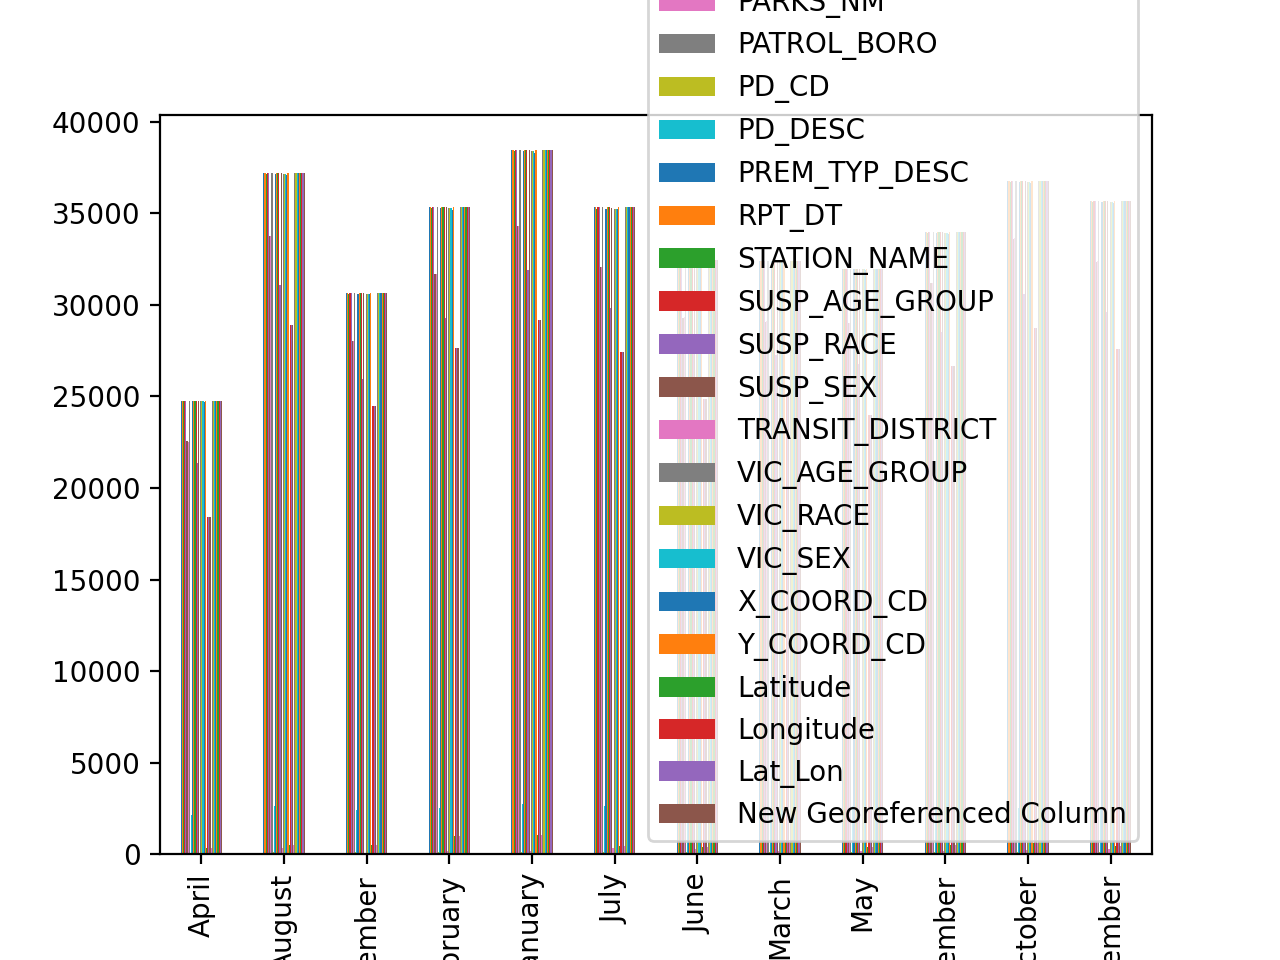

<AxesSubplot:xlabel='CMPLNT_FR_DT'>

In [31]:
p1.count().plot(kind='bar')

<IPython.core.display.Javascript object>


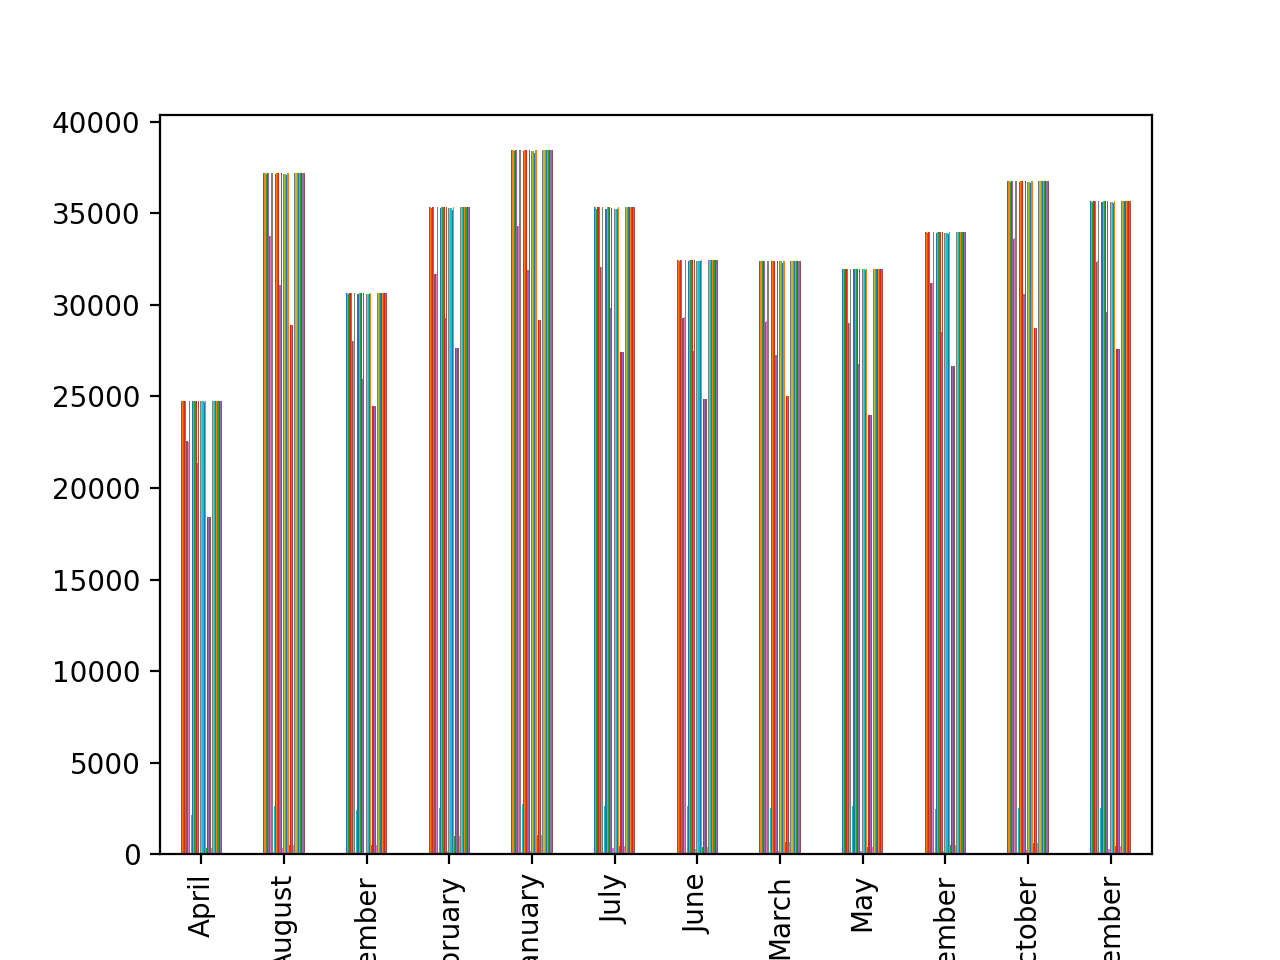

<AxesSubplot:xlabel='CMPLNT_FR_DT'>

In [34]:
p1.count().plot(kind='bar',legend=False)

<IPython.core.display.Javascript object>


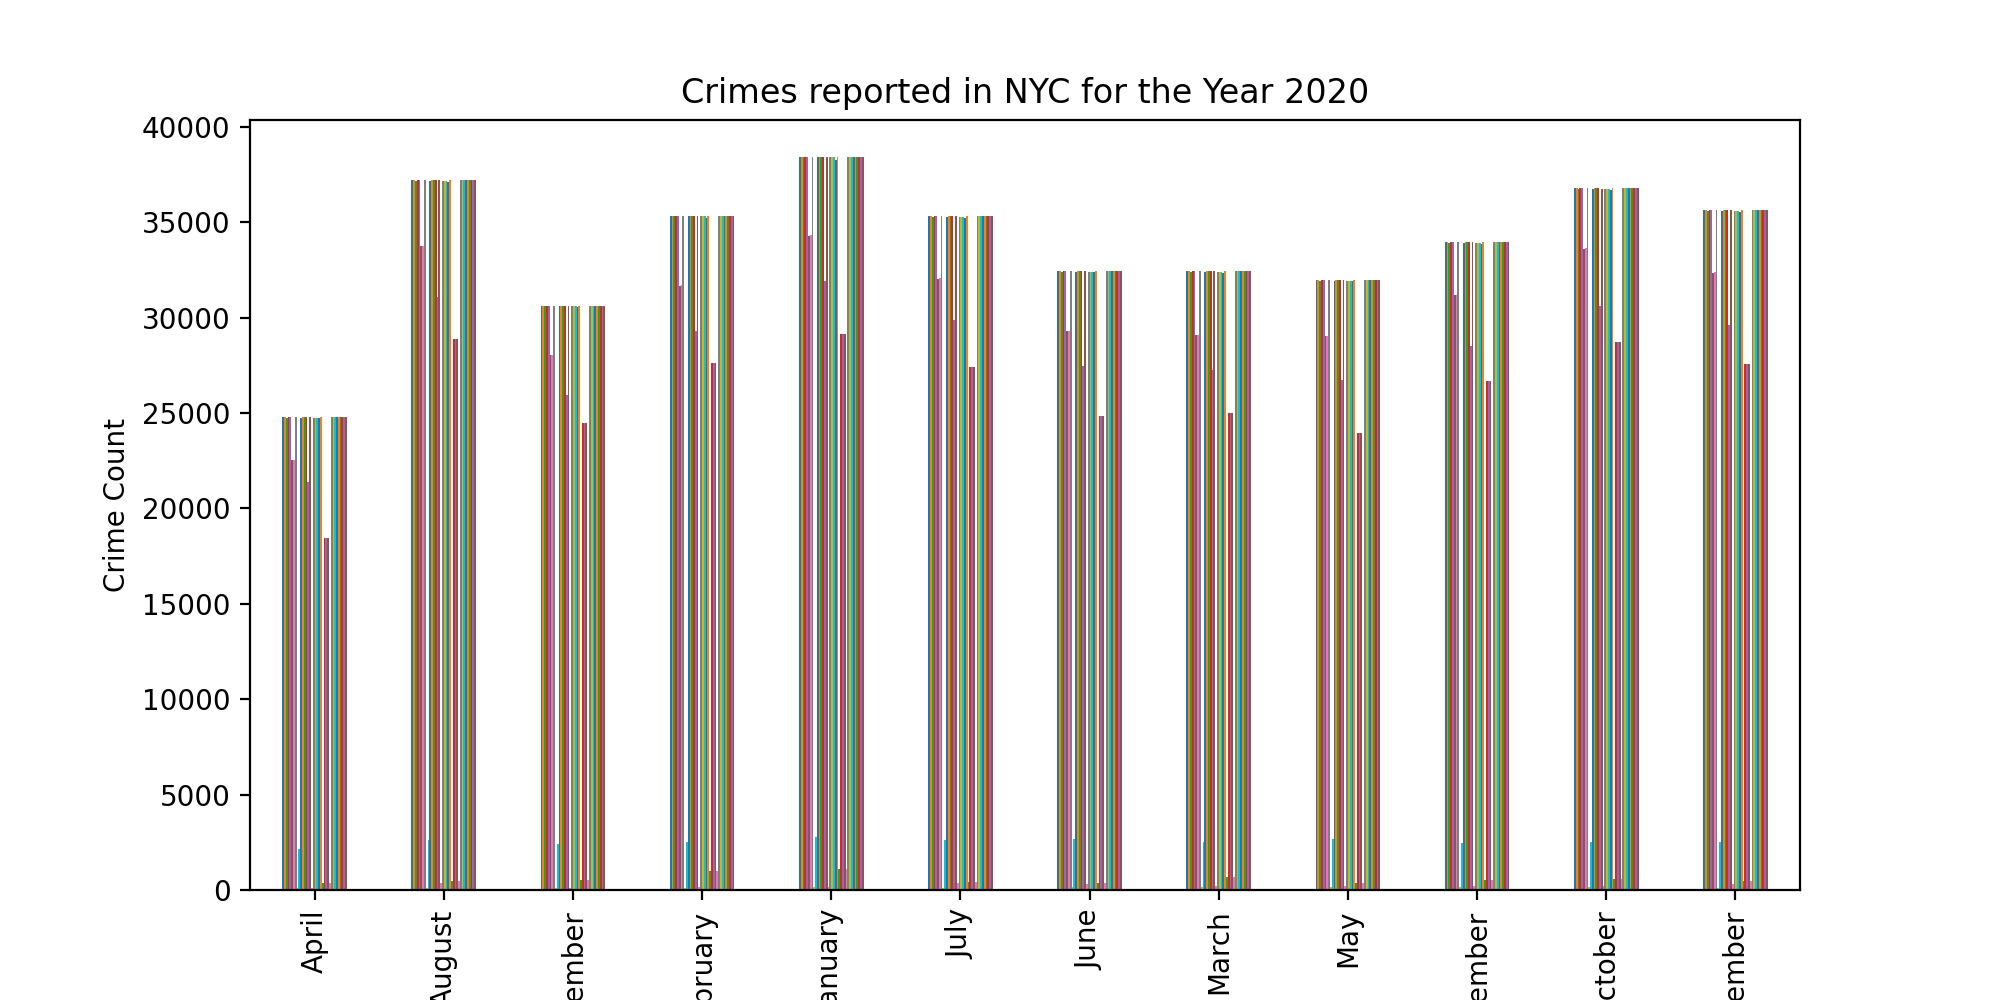

Text(0, 0.5, 'Crime Count')

In [56]:
ax = p1.count().plot(kind='bar',figsize=(10,5),legend=False)
ax.set_title('Crimes reported in NYC for the Year 2020')
ax.set_xlabel("Months")
ax.set_ylabel("Crime Count")